Paper: Spatial Transcriptomics to define transcriptional patterns of zonation and structural components in the mouse liver

ShortName: hildebrandt2021spatial

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://zenodo.org/record/5595907#.Yk2WZJpByNg

In [ ]:
# The downloaded raw data do not contain the standard files like:
# xxx_filtered_feature_bc_matrix.h5
# xxx_raw_feature_bc_matrix.h5
# xxx_scalefactors_json.json.gz
# xxx_tissue_hires_image.png.gz
# xxx_tissue_positions_list.csv.gz

# so we can not directly use the read_visium provided by SCANPY
# instead:

In [10]:
import scanpy as sc
import numpy as np

In [1]:
path = '/home/yzy/PUBDT/st/Spatial_transcriptomics/hildebrandt2021spatial/raw/Hepaquery_data/st-count'

In [4]:
adata = sc.read_csv(f'{path}/CN16_norm_D1.tsv',delimiter='\t')

In [ ]:
# we find that the raw name for each obs contains the coordinate information:

In [21]:
adata.obs_names

Index(['2x16', '2x18', '2x20', '2x22', '2x24', '2x26', '2x28', '2x30', '2x32',
       '2x34',
       ...
       '64x38', '64x40', '65x25', '65x27', '65x29', '65x31', '65x33', '65x35',
       '65x37', '65x39'],
      dtype='object', length=1262)

In [ ]:
# construct the spatial matrix using adata.obs

In [22]:
spatial_mat = []
for i in list(adata.obs_names):
    x = i.split('x')[0]
    y = i.split('x')[1]
    spatial_mat.append([int(x),int(y)])
spatial_mat = np.array(spatial_mat)

In [ ]:
# assign the spatial matrix to adata.obsm['spatial']

In [24]:
adata.obsm['spatial'] = spatial_mat

In [25]:
# test ploting

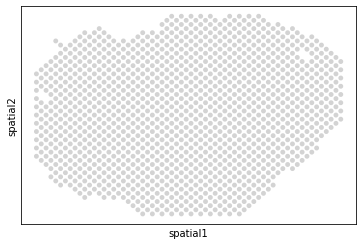

In [26]:
sc.pl.embedding(adata,basis='spatial')

In [ ]:
# dump the Anndata to h5ad

In [ ]:
adata.write_h5ad(h5ad_path)

In [2]:
# run the same procedure for other samples:
#     CN16_D1
#     CN16_D2  
#     CN16_E1
#     CN16_E2
#     CN65_C1
#     CN65_C2  
#     CN65_D1    
#     CN65_D2
#     CN65_E1
#     CN73_C1
#     CN73_D1 
#     CN73_E2    

In [3]:
# The data is now transform from raw to Anndata, then it should be processed to be accepted to SODB

In [ ]:
# Run ShortName.ipynb in Anndata2SODB path